In [1]:
import pathlib
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
dataDirectory = pathlib.Path('DATA\\')
classNames = [item.name for item in dataDirectory.glob('*')][:2]
classNames

['normal', 'potholes']

In [3]:
dataAdd = 'DATA' 
normalAdd = 'DATA\\normal'
potholesAdd = 'DATA\\potholes'

# 定义一个数据生成器，用于处理图像数据，并对数据进行归一化处理。同时，将数据集的20%作为验证数据，而其余80%用于训练
dataImageDataGenerator = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)
dataTrain = dataImageDataGenerator.flow_from_directory(dataAdd, target_size = (224, 224), batch_size = 32, 
                                                       subset = 'training', class_mode = 'binary')
dataVal = dataImageDataGenerator.flow_from_directory(dataAdd, target_size = (224, 224), batch_size = 32,
                                                     subset = 'validation', class_mode = 'binary')

Found 241 images belonging to 2 classes.
Found 59 images belonging to 2 classes.


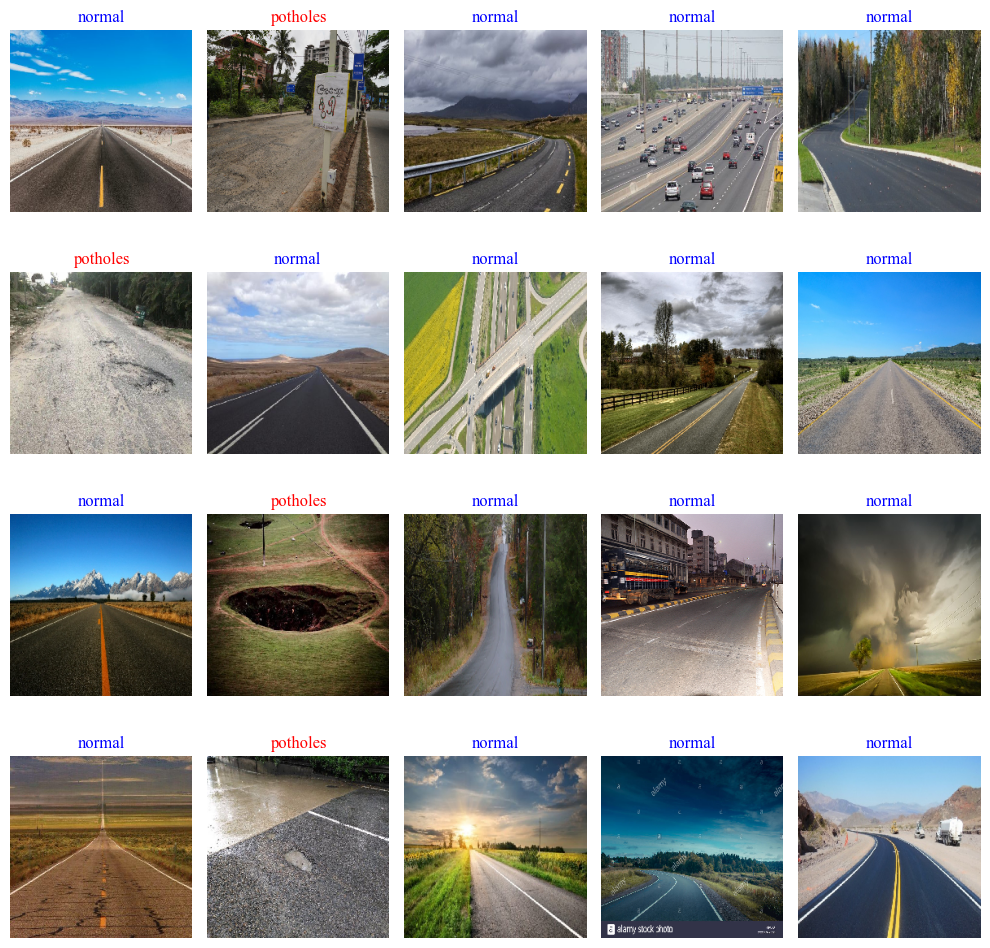

In [4]:
def random_plot_images():
    images, labels = dataTrain.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 10))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        if label == 0:
            plt.title(classNames[label],fontname='Times New Roman', fontsize=12, color='blue')
        else:
            plt.title(classNames[label],fontname='Times New Roman', fontsize=12, color='red')
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()       
    plt.savefig('Figures\\图像数据观测.pdf')


random_plot_images()